In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn  import preprocessing

# Load DATA from CSV file 

In [33]:
data = pd.read_csv('teleCust1000t.csv')
data.head(-3)

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3
...,...,...,...,...,...,...,...,...,...,...,...,...
992,1,34,52,1,2,106.0,2,19,0.0,0,2,3
993,3,26,54,1,30,26.0,3,1,0.0,1,2,4
994,1,15,46,1,17,63.0,5,1,0.0,0,2,4
995,3,10,39,0,0,27.0,3,0,0.0,1,3,1


# Data Visualization and Analysis

In [34]:
# how many of each class is in our data set
data['custcat'].value_counts()

3    281
1    266
4    236
2    217
Name: custcat, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000210FB4510A0>]],
      dtype=object)

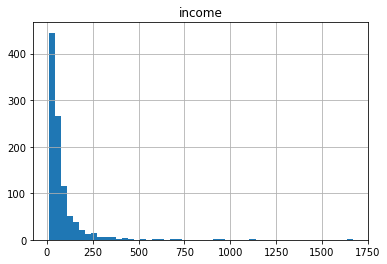

In [35]:
data.hist(column ='income', bins = 50)

In [36]:
# Feature Set 

X = data[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']] .values
y = data[['custcat']].values

In [37]:
X[0:3]

array([[  2.,  13.,  44.,   1.,   9.,  64.,   4.,   5.,   0.,   0.,   2.],
       [  3.,  11.,  33.,   1.,   7., 136.,   5.,   5.,   0.,   0.,   6.],
       [  3.,  68.,  52.,   1.,  24., 116.,   1.,  29.,   0.,   1.,   2.]])

# Normalize Data 

In [40]:
#Data Standardization 

Scaler = StandardScaler()
X = Scaler.fit_transform(X)
X[0:2]

array([[-0.02696767, -1.055125  ,  0.18450456,  1.0100505 , -0.25303431,
        -0.12650641,  1.0877526 , -0.5941226 , -0.22207644, -1.03459817,
        -0.23065004],
       [ 1.19883553, -1.14880563, -0.69181243,  1.0100505 , -0.4514148 ,
         0.54644972,  1.9062271 , -0.5941226 , -0.22207644, -1.03459817,
         2.55666158]])

In [41]:
# Train Test Split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (800, 11) (800, 1)
Test set: (200, 11) (200, 1)


# Model  K nearest neighbor (KNN)

In [47]:
from sklearn.neighbors  import KNeighborsClassifier

In [53]:
# Training 
# for K = 4 
K = 4
Model = KNeighborsClassifier(n_neighbors = K)
Model.fit(X_train,y_train)
y_hat = Model.predict(X_test)
y_hat[0:5]

<ipython-input-53-c60162c512e0>:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  Model.fit(X_train,y_train)


array([1, 1, 3, 2, 4], dtype=int64)

In [55]:
#Evaluation 
from sklearn import metrics 
print('test set accuracy :', metrics.accuracy_score(y_test,y_hat))

test set accuracy : 0.32


# Best Model

In [70]:
from sklearn.model_selection import GridSearchCV
param = {'n_neighbors': np.arange(1,100),
        'metric' : ['eucludean', 'manhattan']}

In [71]:
GRID = GridSearchCV(KNeighborsClassifier() ,param , cv =5)

In [72]:
GRID.fit(X_train , y_train)

C:\Users\Administrateur.IMPRESSION_SITE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Administrateur.IMPRESSION_SITE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Administrateur.IMPRESSION_SITE\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrateur.IMPRESSION_SITE\anaconda3\lib\site-packages\sklearn\neighbors\_base.py", line 1157, in fit
    return self._fit(X)
  File "C:\Users\Administrateur.IMPRESSION_SITE\anaconda3\lib\sit

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['eucludean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])})

In [73]:
GRID.best_score_

0.39

In [74]:
GRID.best_params_

{'metric': 'manhattan', 'n_neighbors': 75}

In [75]:
GRID.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=75)

In [76]:
model1=GRID.best_estimator_
model1.score(X_test,y_test)

0.325